# Extraction of International Financial Statistics data from the IMF

The example below retrieves quarterly (period: Q) Seasonally Adjusted Real Gross Domestic Product (indicator: NGDP_R_SA_XDC) for the USA (country code: US), from the International Financial Statistics (IFS) series using the **imfdatapy** package. The function call returns the observation values, and the time period for each value (in the format YYYY-MM-DD).

First, we begin with loading the **imfdatapy** library for data extraction and from the IMF and **pandas** for data manipulation.

##  `**imfdatapy**` package 

Source code foris available on [Github](https://github.com/Economic-and-Financial-Data-Discovery/imfdatapy).

The package can be installed using ```pip```.

In [1]:
from imfdatapy.imf import *

2023-02-13 21:30:20,384 imf_log.py:39 - INFO - Current directory C:\Users\sahil\OneDrive\Desktop\IITC RA Work\imfdatapy\demo
2023-02-13 21:30:20,384 imf_log.py:40 - INFO - Started log ../log/imfdatapy_2023-02-13-21-30-20.log


In [2]:
import pandas as pd # for QoQ change calculation

To download the data from the International Financial Statistics, we use the ```IFS``` class, provding the search terms for the index we are looking for, the country code, the period frequency (Q) and the period. Use the ```download_data``` method to download the data and the metadata to '../out' folder and create a pandas dataframe. The log messages specify which files are created in the '../out' directory.

In [3]:
pd.options.display.max_colwidth = 90

In [4]:
ifs = IFS(search_terms=["gross domestic product"], countries=["US"], period='Q', start_date="2010",
                  end_date="2023")
df = ifs.download_data()
df

2023-02-13 21:30:20,437 imf.py:59 - INFO - Inputs: series = 'IFS', search_terms = ['gross domestic product'], countries = ['US'], start_date = '2010', end_date = '2023'
2023-02-13 21:30:27,364 imf.py:139 - INFO - Output all IMF series in a (259, 11) table to ..\out\series_imf.csv
2023-02-13 21:30:27,434 imf.py:141 - INFO - Output series containing 'IFS' in a (49, 11) table to ..\out\series_ifs.csv
2023-02-13 21:32:16,259 imf.py:166 - INFO - Output dimension CL_FREQ_IFS in a (3, 2) table to ..\out\dim_cl_freq_ifs.csv
2023-02-13 21:32:23,266 imf.py:166 - INFO - Output dimension CL_AREA_IFS in a (278, 3) table to ..\out\dim_cl_area_ifs.csv
2023-02-13 21:32:29,991 imf.py:166 - INFO - Output dimension CL_INDICATOR_IFS in a (1679, 3) table to ..\out\dim_cl_indicator_ifs.csv
2023-02-13 21:32:36,932 imf.py:187 - INFO - Output meta data of IFS in a (1679, 3) table to ..\out\meta_ifs.csv
2023-02-13 21:32:44,113 imf.py:189 - INFO - Output meta data of IFS with search search_terms ['gross domestic

,VALUE,FREQ,COUNTRY,ID,UNIT_MULT,BASE_YEAR,TIME_FORMAT,PERIOD,DESCRIPTION.XML_LANG,DESCRIPTION
0,99.3392105021347,Q,US,NGDP_D_SA_IX,0,2010,P3M,2010-01-01,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
1,99.8236914454449,Q,US,NGDP_D_SA_IX,0,2010,P3M,2010-04-01,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
2,100.125182516395,Q,US,NGDP_D_SA_IX,0,2010,P3M,2010-07-01,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
3,100.711915536026,Q,US,NGDP_D_SA_IX,0,2010,P3M,2010-10-01,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
4,101.231913593634,Q,US,NGDP_D_SA_IX,0,2010,P3M,2011-01-01,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
...,...,...,...,...,...,...,...,...,...,...
99,6087280.3,Q,US,NGDP_SA_XDC,6,NaN,P3M,2021-10-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
100,6185120,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-01-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
101,6312119,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-04-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
102,6430985.3,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-07-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"


Here, all the data that matched the search term is loaded. To view the index names, use the meta data file as shown below.

In [5]:
meta = pd.read_csv('../out/meta_gross domestic product_US_Q_2010_2023.csv')

In [6]:
meta

,ID,DESCRIPTION.XML_LANG,DESCRIPTION
0,NGDP_D_IX,en,"Gross Domestic Product, Deflator, Index"
1,NGDP_D_SA_IX,en,"Gross Domestic Product, Deflator, Seasonally Adjusted, Index"
2,NGDP_XDC,en,"Gross Domestic Product, Nominal, Domestic Currency"
3,NGDP_SA_XDC,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
4,NGDP_NSA_XDC,en,"Gross Domestic Product, Nominal, Unadjusted, Domestic Currency"
5,NGDP_R_XDC,en,"Gross Domestic Product, Real, Domestic Currency"
6,NGDP_R_SA_XDC,en,"Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency"
7,NGDP_R_NSA_XDC,en,"Gross Domestic Product, Real, Unadjusted, Domestic Currency"


We are interested in 	Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency. We will filter the dataframe to contain only this index.

In [7]:
df = df[df['ID']=='NGDP_SA_XDC'].reset_index()


In [8]:
df.tail(n=5)

,index,VALUE,FREQ,COUNTRY,ID,UNIT_MULT,BASE_YEAR,TIME_FORMAT,PERIOD,DESCRIPTION.XML_LANG,DESCRIPTION
47,99,6087280.3,Q,US,NGDP_SA_XDC,6,NaN,P3M,2021-10-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
48,100,6185120,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-01-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
49,101,6312119,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-04-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
50,102,6430985.3,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-07-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"
51,103,6533114.5,Q,US,NGDP_SA_XDC,6,NaN,P3M,2022-10-01,en,"Gross Domestic Product, Nominal, Seasonally Adjusted, Domestic Currency"


In [9]:
df['VALUE'] = pd.to_numeric(df['VALUE'])

In [10]:
df['QoQ'] = df['VALUE'].pct_change()

Now, we may plot the results using **matplotlib**.

In [11]:
import matplotlib.pyplot as plt

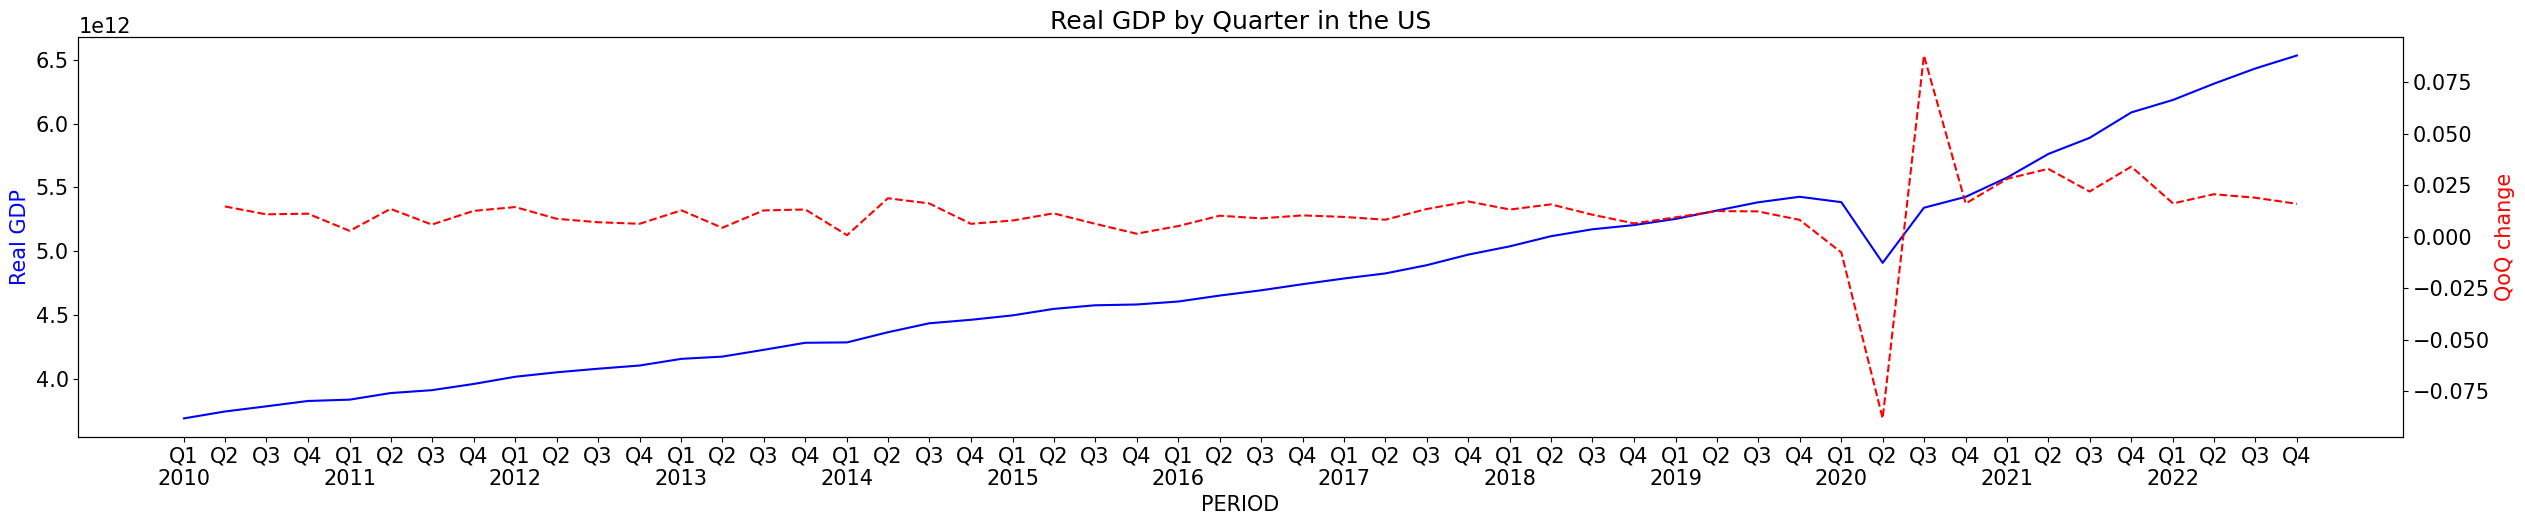

In [12]:
plt.rcParams.update({'font.size': 15})

t = df['PERIOD']
data1 = df['VALUE'] * 10**6
data2 = df['QoQ']

labels = [f'Q{int(ts.month/3)+1}\n{ts.year}' if ts.month == 1
          else f'Q{int(ts.month/3)+1}' for ts in t]

fig, ax1 = plt.subplots()

ax1.set_xlabel('PERIOD')
ax1.set_ylabel('Real GDP', color='blue')
ax1.set_xticks(t)
ax1.set_xticklabels(labels);
ax1.plot(t, data1, color='blue')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()

ax2.set_ylabel('QoQ change', color='red')
ax2.set_xticks(t)
ax2.set_xticklabels(labels);
ax2.plot(t, data2, '--', color='red')
ax2.tick_params(axis='y', labelcolor='black')

fig.set_size_inches(25.5, 5.5)
plt.title('Real GDP by Quarter in the US')
fig.tight_layout()
plt.show()